In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing dataset
df= pd.read_csv(r'C:\Pythonedp\univariate_profits_and_populations_from_the_cities.csv')
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
X=np.array(df['population'])
y=np.array(df['profit'])
X[:5]


array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])

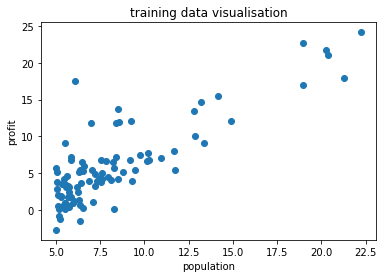

In [5]:
#visualizing data
plt.scatter(X,y)
plt.xlabel("population")
plt.ylabel("profit")
plt.title("training data visualisation");

In [6]:
#Lets create a matrix with single column of ones
m=97
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [7]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1
X_1 = X.reshape(m, 1)
X_1[:5]

array([[6.1101],
       [5.5277],
       [8.5186],
       [7.0032],
       [5.8598]])

In [8]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column wise) to make a single 2D array. 
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [9]:
theta= np.zeros(2)
theta

array([0., 0.])

numpy.dot() this function returns the dot product of two arrays. For 2-D vectors, it is the equivalent to matrix multiplication
numpy.subtract() this function perform the element wise subtraction
numpy.square() this function perform the element wise square

In [10]:
def compute_cost(X, y, theta):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = X.dot(theta)
  #print('predictions= ', predictions[:5])
  errors = np.subtract(predictions, y)
  #print('errors= ', errors[:5]) 
  sqrErrors = np.square(errors)
  #print('sqrErrors= ', sqrErrors[:5]) 
  J = 1 / (2 * m) * np.sum(sqrErrors)

  return J

In [11]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 32.072733877455676


In [20]:
def gradient_descent(X, y, theta, alpha, iterations):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value. 

  Output Parameters
  -----------------
  theta: Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    #print('predictions= ', predictions[:5])
    errors = np.subtract(predictions, y)
    #print('errors= ', errors[:5])
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    #print('sum_delta= ', sum_delta[:5])
    theta = theta - sum_delta;

    cost_history[i] = compute_cost(X, y, theta)  

  return theta, cost_history

In [21]:
theta= [0., 0.]
iterations = 1500;
alpha = 0.01;

In [22]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [-3.63029144  1.16636235]
cost_history = [6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


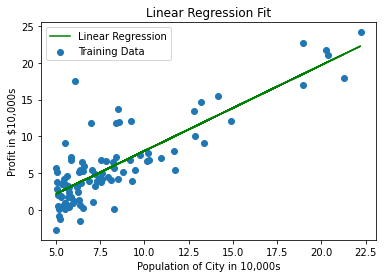

In [23]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend();

Text(0.5, 1.0, 'Convergence of gradient descent')

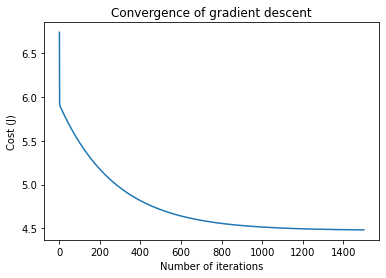

In [24]:
plt.plot(range(1, iterations + 1),cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [25]:
#testing the model
predict1 = np.array([1, 3.5]).dot(theta)
print("For population = 35,000, our prediction of profit is", predict1 * 10000)

predict2 = np.array([1, 7]).dot(theta)
print("For population = 70,000, our prediction of profit is", predict2 * 10000)

For population = 35,000, our prediction of profit is 4519.7678677017675
For population = 70,000, our prediction of profit is 45342.45012944714


NameError: name 'model' is not defined